In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/layoffs-data-2022/layoffs_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/layoffs-data-2022/layoffs_data.csv")
df.head(10)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Veeam,Columbus,Data,200.0,2023-03-23,https://blocksandfiles.com/2023/03/23/200-peop...,500.0,Acquired,2023-03-24 18:36:13,United States,NaN,Unknown
1,TakeOff,Kyiv,Retail,50.0,2023-03-23,https://dou.ua/lenta/news/takeoff-layoff/?,146.0,Unknown,2023-03-26 21:25:22,Ukraine,NaN,Unknown
2,Slite,Paris,Other,10.0,2023-03-23,https://www.linkedin.com/posts/christophepasqu...,15.0,Series A,2023-03-24 18:39:58,France,0.25,Unknown
3,Indeed,Austin,HR,2200.0,2023-03-22,https://www.indeed.com/press/releases/a-messag...,5.0,Acquired,2023-03-22 16:24:35,United States,0.15,Unknown
4,Logitech,Geneva,Hardware,300.0,2023-03-22,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-03-23 16:47:11,Switzerland,NaN,Unknown
5,Glassdoor,SF Bay Area,HR,140.0,2023-03-22,https://www.glassdoor.com/about-us/a-message-f...,204.0,Acquired,2023-03-22 21:04:27,United States,0.15,https://docs.google.com/spreadsheets/d/1WL5GRU...
6,Wejo,Chester,Transportation,40.0,2023-03-22,https://wejo.gcs-web.com/node/7461/html,376.0,Post-IPO,2023-03-24 18:27:57,United Kingdom,0.16,Unknown
7,Rewind,Ottawa,Data,NaN,2023-03-22,https://rewind.com/blog/a-difficult-update-at-...,80.0,Series B,2023-03-22 23:43:22,Canada,NaN,Unknown
8,Roofstock,SF Bay Area,Real Estate,NaN,2023-03-22,https://techcrunch.com/2023/03/22/roofstock-va...,365.0,Series E,2023-03-23 16:30:39,United States,0.27,Unknown
9,Just Eat,London,Food,1700.0,2023-03-21,https://www.yahoo.com/entertainment/just-eat-l...,NaN,Acquired,2023-03-21 23:55:29,United Kingdom,NaN,Unknown


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2429 non-null   object 
 1   Location_HQ                 2429 non-null   object 
 2   Industry                    2429 non-null   object 
 3   Laid_Off_Count              1662 non-null   float64
 4   Date                        2428 non-null   object 
 5   Source                      2429 non-null   object 
 6   Funds_Raised                2207 non-null   float64
 7   Stage                       2429 non-null   object 
 8   Date_Added                  2429 non-null   object 
 9   Country                     2429 non-null   object 
 10  Percentage                  1613 non-null   float64
 11  List_of_Employees_Laid_Off  2428 non-null   object 
dtypes: float64(3), object(9)
memory usage: 227.8+ KB


In [4]:
df=df.drop(['Location_HQ','Source','Date','List_of_Employees_Laid_Off'],axis=1)
df

,Company,Industry,Laid_Off_Count,Funds_Raised,Stage,Date_Added,Country,Percentage
0,Veeam,Data,200.0,500.0,Acquired,2023-03-24 18:36:13,United States,NaN
1,TakeOff,Retail,50.0,146.0,Unknown,2023-03-26 21:25:22,Ukraine,NaN
2,Slite,Other,10.0,15.0,Series A,2023-03-24 18:39:58,France,0.25
3,Indeed,HR,2200.0,5.0,Acquired,2023-03-22 16:24:35,United States,0.15
4,Logitech,Hardware,300.0,NaN,Post-IPO,2023-03-23 16:47:11,Switzerland,NaN
...,...,...,...,...,...,...,...,...
2424,HopSkipDrive,Transportation,8.0,45.0,Unknown,2020-04-03 04:47:03,United States,0.10
2425,Panda Squad,Consumer,6.0,1.0,Seed,2020-04-17 00:12:49,United States,0.75
2426,Tamara Mellon,Retail,20.0,90.0,Series C,2020-03-31 16:04:23,United States,0.40
2427,EasyPost,Logistics,75.0,12.0,Series A,2020-03-31 13:21:54,United States,NaN


In [5]:
#taking care of missing values
missing_values=df.isnull().sum()
print(missing_values)

Company             0
Industry            0
Laid_Off_Count    767
Funds_Raised      222
Stage               0
Date_Added          0
Country             0
Percentage        816
dtype: int64


In [6]:
df=df.dropna(how='any', subset=['Laid_Off_Count','Percentage','Funds_Raised'])
df.head(10)

,Company,Industry,Laid_Off_Count,Funds_Raised,Stage,Date_Added,Country,Percentage
2,Slite,Other,10.0,15.0,Series A,2023-03-24 18:39:58,France,0.25
3,Indeed,HR,2200.0,5.0,Acquired,2023-03-22 16:24:35,United States,0.15
5,Glassdoor,HR,140.0,204.0,Acquired,2023-03-22 21:04:27,United States,0.15
6,Wejo,Transportation,40.0,376.0,Post-IPO,2023-03-24 18:27:57,United Kingdom,0.16
11,Workhuman,HR,130.0,131.0,Unknown,2023-03-21 23:35:56,Ireland,0.10
12,FreshBooks,Finance,80.0,331.0,Unknown,2023-03-21 23:32:09,Canada,0.10
15,Smallcase,Finance,15.0,62.0,Series C,2023-03-21 03:43:24,India,0.04
22,Livspace,Retail,100.0,431.0,Series F,2023-03-20 03:46:30,India,0.02
23,Symend,Other,50.0,148.0,Series C,2023-03-23 16:41:33,Canada,0.25
27,Course Hero,Education,42.0,477.0,Series C,2023-03-16 21:24:48,United States,0.15


In [7]:
missing_values=df.isnull().sum()
print(missing_values)

Company           0
Industry          0
Laid_Off_Count    0
Funds_Raised      0
Stage             0
Date_Added        0
Country           0
Percentage        0
dtype: int64


In [8]:
df_country=df.groupby('Country',as_index=False).sum()

In [9]:
print(df_country)

                 Country  Laid_Off_Count  Funds_Raised  Percentage
0              Argentina           233.0      572.0000      0.8600
1              Australia          1447.0     3236.0000      6.3800
2                Austria           270.0      546.0000      0.2700
3                 Brazil          6743.0    12575.7000      8.2700
4                 Canada          5065.0    10716.0000     14.7200
5                  China           755.0      921.0000      0.5900
6                Denmark           185.0      175.0000      1.3500
7                Estonia           272.0      289.0000      0.4800
8                Finland           250.0      169.0000      0.1700
9                 France           653.0     1803.0000      1.0800
10               Germany          6369.0    19815.6800      8.9750
11             Hong Kong           730.0      996.0000      0.4300
12                 India         20811.0    83129.4000     16.8800
13             Indonesia          2721.0    11995.0000      1.

In [10]:
print(df_country.max())

Country           United States
Laid_Off_Count         212316.0
Funds_Raised           686100.4
Percentage             156.1425
dtype: object


<AxesSubplot:xlabel='Country'>

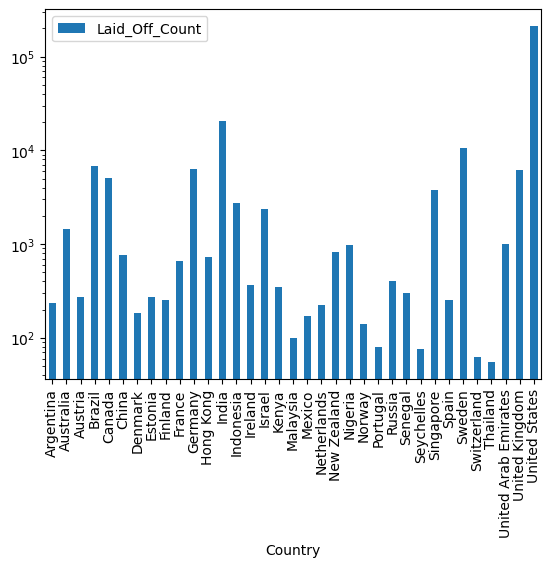

In [11]:
type(df_country)
df_country.plot(x='Country',y='Laid_Off_Count',kind='bar',logy=True)

In [12]:
df_countries_list=['Brazil','Canada','Germany','India','Singapore','Sweden','United States']
df_countries=df_country.loc[df_country['Country'].isin(df_countries_list)]
df_countries

,Country,Laid_Off_Count,Funds_Raised,Percentage
3,Brazil,6743.0,12575.7000,8.2700
4,Canada,5065.0,10716.0000,14.7200
10,Germany,6369.0,19815.6800,8.9750
12,India,20811.0,83129.4000,16.8800
27,Singapore,3795.0,14217.9755,4.8400
29,Sweden,10582.0,8714.0000,1.2500
34,United States,212316.0,686100.4000,156.1425


([<matplotlib.patches.Wedge at 0x776c004e2e10>,
 [Text(1.0965052372898285, 0.08761429447285998, 'Brazil'),
  Text(1.0736406958984184, 0.23936511047092934, 'Canada'),
  Text(1.031578118528449, 0.3818986585120529, 'Germany'),
  Text(0.8581188729522664, 0.6882092704135366, 'India'),
  Text(0.6246249974685374, 0.90545215916548, 'Singapore'),
  Text(0.4624309526367022, 0.998076957976444, 'Sweden'),
  Text(-0.8881661221711996, -0.6489691359590022, 'United States')],
 [Text(0.5980937657944518, 0.04778961516701453, '3%'),
  Text(0.5856221977627736, 0.1305627875295978, '2%'),
  Text(0.5626789737427902, 0.2083083591883925, '2%'),
  Text(0.46806483979214525, 0.37538687477101995, '8%'),
  Text(0.3407045440737477, 0.4938829959084436, '1%'),
  Text(0.2522350650745648, 0.5444056134416967, '4%'),
  Text(-0.4844542484570179, -0.3539831650685466, '80%')])

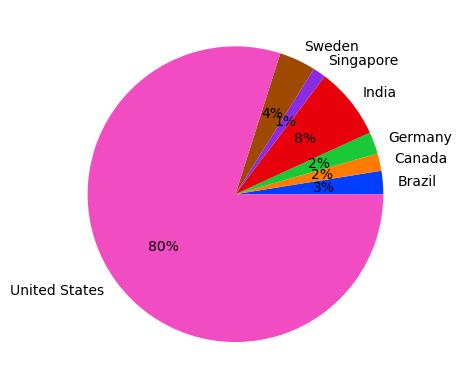

In [13]:
palette_color = sns.color_palette('bright')
plt.pie(data=df_countries,x='Laid_Off_Count',labels=df_countries_list,colors=palette_color,autopct='%.0f%%')